In [1]:
import tensorflow as tf

In [2]:
!wget --no-check-certificate \
  https://github.com/dicodingacademy/assets/raw/main/ml_pemula_academy/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2024-03-03 17:08:22--  https://github.com/dicodingacademy/assets/raw/main/ml_pemula_academy/messy-vs-clean-room.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pemula_academy/messy-vs-clean-room.zip [following]
--2024-03-03 17:08:22--  https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pemula_academy/messy-vs-clean-room.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M   227MB/s    in 0.3s    

2024-03-03 17:08:23 

In [4]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [5]:
os.listdir('/tmp/images/train')

['messy', 'clean']

In [6]:
os.listdir('/tmp/images/val')

['messy', 'clean']

In [7]:
# membuat direktori ruangan rapi pada direktori data training
#train_clean_dir = os.path.join(train_dir, 'clean')

# membuat direktori ruangan berantakan pada direktori data training
#train_messy_dir = os.path.join(train_dir, 'messy')

# membuat direktori ruangan rapi pada direktori data validasi
#validation_clean_dir = os.path.join(validation_dir, 'clean')

# membuat direktori ruangan berantakan pada direktori data validasi
#validation_messy_dir = os.path.join(validation_dir, 'messy')

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

validation_datagen = ImageDataGenerator(
                    rescale=1./255)

In [9]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena ini merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena ini merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [12]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [13]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=25,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/25
25/25 - 9s - loss: 0.7896 - accuracy: 0.4900 - val_loss: 0.6934 - val_accuracy: 0.5000 - 9s/epoch - 355ms/step
Epoch 2/25
25/25 - 1s - loss: 0.6944 - accuracy: 0.4600 - val_loss: 0.6932 - val_accuracy: 0.5000 - 1s/epoch - 40ms/step
Epoch 3/25
25/25 - 1s - loss: 0.6933 - accuracy: 0.4700 - val_loss: 0.6929 - val_accuracy: 0.7500 - 1s/epoch - 41ms/step
Epoch 4/25
25/25 - 2s - loss: 0.6921 - accuracy: 0.4900 - val_loss: 0.6789 - val_accuracy: 0.5500 - 2s/epoch - 61ms/step
Epoch 5/25
25/25 - 1s - loss: 0.6987 - accuracy: 0.5500 - val_loss: 0.6870 - val_accuracy: 0.5500 - 984ms/epoch - 39ms/step
Epoch 6/25
25/25 - 1s - loss: 0.6796 - accuracy: 0.6000 - val_loss: 0.6673 - val_accuracy: 0.6000 - 974ms/epoch - 39ms/step
Epoch 7/25
25/25 - 1s - loss: 0.6522 - accuracy: 0.6900 - val_loss: 0.6557 - val_accuracy: 0.5500 - 975ms/epoch - 39ms/step
Epoch 8/25
25/25 - 1s - loss: 0.6369 - accuracy: 0.6500 - val_loss: 0.5498 - val_accuracy: 0.8000 - 988ms/epoch - 40ms/step
Epoch 9/25
25/25 - 

Saving download.jpg to download.jpg
1/1 [==============================] - 0s 18ms/step
download.jpg
clean


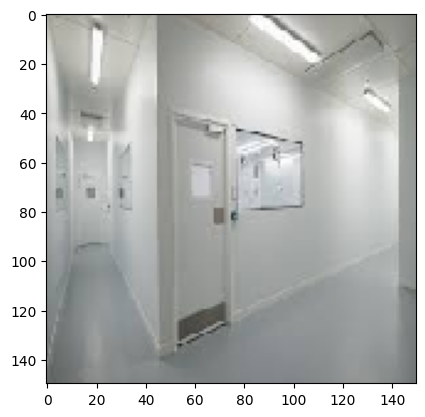

In [17]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes==1:
   print('messy')
  else:
   print('clean')

In [15]:
classes

array([[1.]], dtype=float32)

In [16]:
print(train_generator.class_indices)

{'clean': 0, 'messy': 1}
